# INFO 6105 Data Science Engineering Methods and Tools - FINAL PROJECT

#### Done by, 
#### Kaavya Loganathan (002317475)
#### Ranjithnath Karunanidhi (002317425)

### So..... What are we focusing on this project?

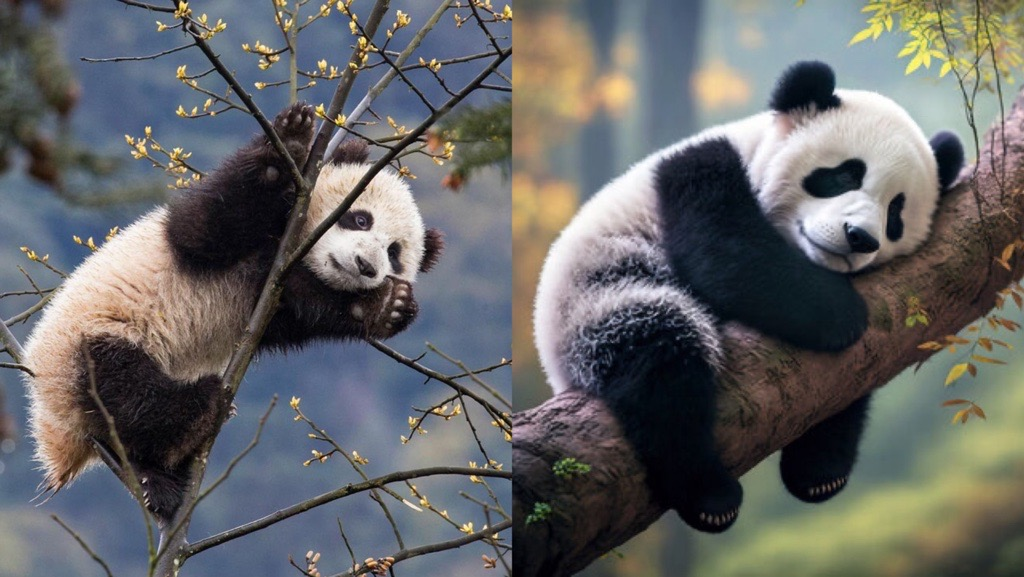

In [3]:
from IPython.display import Image, display
display(Image(filename="Panda.jpeg", width=500, height=500))

### Is it about Animals? Animal Safety? 
### Oh wait.. Why specifically Pandas? Panda as an animal is linked with Pandas library in Python?

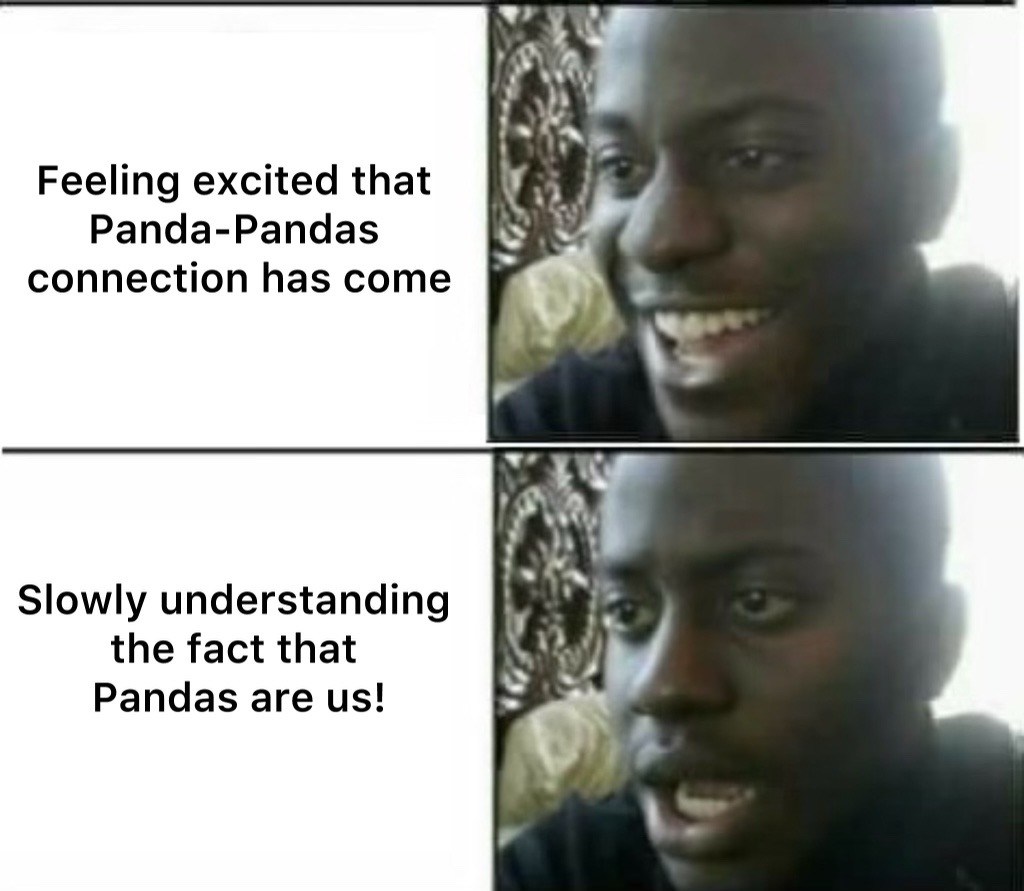

In [5]:
display(Image(filename="Reality.jpeg", width=600, height=600))

#### Why? Pandas spend most of the day just by eating and sleeping. Why do they always eat and sleep?
#### Are they lazy?
#### Nooooooooooooo...!!!!!!!!!!! They do that to conserve the energy, so do we! (Post Covid Pandemic) 

## Project Title: 

### The hidden costs of Unhealthy Dietary Patterns and Mental Health

Let's see the impact of unhealthy dietary patterns in mental health

## Hypothesis:

### Poor dietary habits significantly increase the prevalence of mental health issues globally

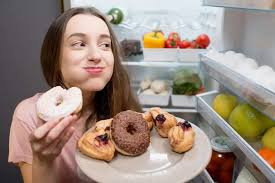

In [9]:
display(Image(filename="sugar.jpeg", width=500, height=500))

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
deaths_physical_activity = pd.read_csv('Deaths_due_to_low_physical_activity.csv')
dietary_compositions = pd.read_csv('Dietary_compositions_by_commodity_group_2019_to_2021.csv')
mental_health_prevalence_2019 = pd.read_csv('Mental_illnesses_prevalence_2019.csv')
mental_health_prevalence_2021 = pd.read_csv('Mental_illnesses_prevalence_2021.csv')

In [12]:
deaths_physical_activity.head()

,Country/area,2019,2021,Absolute Change,Relative Change
0,Afghanistan,"1,833","1,873",40,2%
1,Albania,235,242,7,3%
2,Algeria,"3,797","3,977",180,5%
3,American Samoa,13,14,1,4%
4,Andorra,8,7,-1,-10%


In [13]:
deaths_physical_activity = deaths_physical_activity.drop(columns=['Absolute Change','Relative Change'], errors='ignore')
deaths_physical_activity.columns = ['Country', 'Deaths_2019', 'Deaths_2021']

In [14]:
deaths_physical_activity.head()

,Country,Deaths_2019,Deaths_2021
0,Afghanistan,"1,833","1,873"
1,Albania,235,242
2,Algeria,"3,797","3,977"
3,American Samoa,13,14
4,Andorra,8,7


In [15]:
def clean_numeric_columns(df):
    """
    Removes non-numeric characters from all numeric columns in the DataFrame.
    """
    for column in df.columns[1:]:  
        df[column] = df[column].str.replace(r'[^\d.]', '', regex=True)  # Remove non-numeric characters
        df[column] = pd.to_numeric(df[column], errors='coerce')  # Convert to numeric
    return df

In [16]:
deaths_physical_activity = clean_numeric_columns(deaths_physical_activity)

In [17]:
deaths_physical_activity.head()

,Country,Deaths_2019,Deaths_2021
0,Afghanistan,1833.0,1873.0
1,Albania,235.0,242.0
2,Algeria,3797.0,3977.0
3,American Samoa,13.0,14.0
4,Andorra,8.0,7.0


In [18]:
dietary_compositions.head()

,Country/area,Other_2019,Other_2021,AlcoholicBeverages_2019,AlcoholicBeverages_2021,Sugar_2019,Sugar_2021,OilsAndFats_2019,OilsAndFats_2021,Meat_2019,...,DairyAndEggs_2019,DairyAndEggs_2021,FruitsAndVeg_2019,FruitsAndVeg_2021,StarchyRoots_2019,StarchyRoots_2021,Pulses_2019,Pulses_2021,CerealsAndGrains_2019,CerealsAndGrains_2021
0,Afghanistan,9.00 kcal,10.00 kcal,0.00 kcal,0.00 kcal,156.00 kcal,132.00 kcal,247.00 kcal,246.00 kcal,42.00 kcal,...,93.00 kcal,94.00 kcal,106.00 kcal,104.00 kcal,47.00 kcal,39.00 kcal,17.00 kcal,16.00 kcal,"1,511.00 kcal","1,512.00 kcal"
1,Albania,67.00 kcal,68.00 kcal,50.00 kcal,50.00 kcal,213.00 kcal,246.00 kcal,387.00 kcal,379.00 kcal,229.00 kcal,...,729.00 kcal,695.00 kcal,530.00 kcal,580.00 kcal,84.00 kcal,87.00 kcal,47.00 kcal,47.00 kcal,"1,039.00 kcal",985.00 kcal
2,Algeria,30.00 kcal,27.00 kcal,6.00 kcal,5.00 kcal,297.00 kcal,295.00 kcal,572.00 kcal,616.00 kcal,109.00 kcal,...,286.00 kcal,276.00 kcal,412.00 kcal,393.00 kcal,117.00 kcal,109.00 kcal,61.00 kcal,61.00 kcal,"1,590.00 kcal","1,616.00 kcal"
3,Angola,13.00 kcal,15.00 kcal,79.00 kcal,73.00 kcal,140.00 kcal,132.00 kcal,336.00 kcal,314.00 kcal,139.00 kcal,...,12.00 kcal,16.00 kcal,129.00 kcal,129.00 kcal,774.00 kcal,810.00 kcal,69.00 kcal,67.00 kcal,735.00 kcal,705.00 kcal
4,Antigua and Barbuda,90.99 kcal,66.99 kcal,137.99 kcal,126.99 kcal,240.98 kcal,264.97 kcal,389.97 kcal,418.96 kcal,435.97 kcal,...,186.99 kcal,198.98 kcal,271.98 kcal,211.98 kcal,42.00 kcal,51.99 kcal,27.00 kcal,5.00 kcal,630.95 kcal,622.94 kcal


In [19]:
dietary_compositions = clean_numeric_columns(dietary_compositions)

In [20]:
dietary_compositions.head()

,Country/area,Other_2019,Other_2021,AlcoholicBeverages_2019,AlcoholicBeverages_2021,Sugar_2019,Sugar_2021,OilsAndFats_2019,OilsAndFats_2021,Meat_2019,...,DairyAndEggs_2019,DairyAndEggs_2021,FruitsAndVeg_2019,FruitsAndVeg_2021,StarchyRoots_2019,StarchyRoots_2021,Pulses_2019,Pulses_2021,CerealsAndGrains_2019,CerealsAndGrains_2021
0,Afghanistan,9.00,10.00,0.00,0.00,156.00,132.00,247.00,246.00,42.00,...,93.00,94.00,106.00,104.00,47.0,39.00,17.0,16.0,1511.00,1512.00
1,Albania,67.00,68.00,50.00,50.00,213.00,246.00,387.00,379.00,229.00,...,729.00,695.00,530.00,580.00,84.0,87.00,47.0,47.0,1039.00,985.00
2,Algeria,30.00,27.00,6.00,5.00,297.00,295.00,572.00,616.00,109.00,...,286.00,276.00,412.00,393.00,117.0,109.00,61.0,61.0,1590.00,1616.00
3,Angola,13.00,15.00,79.00,73.00,140.00,132.00,336.00,314.00,139.00,...,12.00,16.00,129.00,129.00,774.0,810.00,69.0,67.0,735.00,705.00
4,Antigua and Barbuda,90.99,66.99,137.99,126.99,240.98,264.97,389.97,418.96,435.97,...,186.99,198.98,271.98,211.98,42.0,51.99,27.0,5.0,630.95,622.94


In [21]:
mental_health_prevalence_2019.head()

,Country/area,Schizophrenia_2019,DepressiveDisorders_2019,AnxietyDisorders_2019,BipolarDisorder_2019,EatingDisorders_2019
0,Afghanistan,0.20%,5.10%,5.00%,0.70%,0.10%
1,Albania,0.20%,2.50%,3.50%,0.50%,0.20%
2,Algeria,0.20%,4.30%,4.90%,0.70%,0.20%
3,American Samoa,0.30%,2.60%,3.70%,0.30%,0.10%
4,Andorra,0.30%,3.80%,5.50%,0.80%,0.60%


In [22]:
mental_health_prevalence_2019 = clean_numeric_columns(mental_health_prevalence_2019)
mental_health_prevalence_2019.head()

,Country/area,Schizophrenia_2019,DepressiveDisorders_2019,AnxietyDisorders_2019,BipolarDisorder_2019,EatingDisorders_2019
0,Afghanistan,0.2,5.1,5.0,0.7,0.1
1,Albania,0.2,2.5,3.5,0.5,0.2
2,Algeria,0.2,4.3,4.9,0.7,0.2
3,American Samoa,0.3,2.6,3.7,0.3,0.1
4,Andorra,0.3,3.8,5.5,0.8,0.6


In [23]:
mental_health_prevalence_2021.head()

,Country/area,Schizophrenia_2021,DepressiveDisorders_2021,AnxietyDisorders_2021,BipolarDisorder_2021,EatingDisorders_2021
0,Afghanistan,0.20%,5.90%,6.00%,0.70%,0.10%
1,Albania,0.20%,3.00%,4.60%,0.50%,0.20%
2,Algeria,0.20%,4.70%,5.50%,0.70%,0.20%
3,American Samoa,0.30%,2.80%,4.20%,0.30%,0.10%
4,Andorra,0.30%,4.50%,6.70%,0.80%,0.60%


In [24]:
mental_health_prevalence_2021 = clean_numeric_columns(mental_health_prevalence_2021)
mental_health_prevalence_2021.head()

,Country/area,Schizophrenia_2021,DepressiveDisorders_2021,AnxietyDisorders_2021,BipolarDisorder_2021,EatingDisorders_2021
0,Afghanistan,0.2,5.9,6.0,0.7,0.1
1,Albania,0.2,3.0,4.6,0.5,0.2
2,Algeria,0.2,4.7,5.5,0.7,0.2
3,American Samoa,0.3,2.8,4.2,0.3,0.1
4,Andorra,0.3,4.5,6.7,0.8,0.6


In [25]:
datasets = [deaths_physical_activity, dietary_compositions, mental_health_prevalence_2019, mental_health_prevalence_2021]
for df in datasets:
    print(df.columns)

Index(['Country', 'Deaths_2019', 'Deaths_2021'], dtype='object')
Index(['Country/area', 'Other_2019', 'Other_2021', 'AlcoholicBeverages_2019',
       'AlcoholicBeverages_2021', 'Sugar_2019', 'Sugar_2021',
       'OilsAndFats_2019', 'OilsAndFats_2021', 'Meat_2019', 'Meat_2021',
       'DairyAndEggs_2019', 'DairyAndEggs_2021', 'FruitsAndVeg_2019',
       'FruitsAndVeg_2021', 'StarchyRoots_2019', 'StarchyRoots_2021',
       'Pulses_2019', 'Pulses_2021', 'CerealsAndGrains_2019',
       'CerealsAndGrains_2021'],
      dtype='object')
Index(['Country/area', 'Schizophrenia_2019', 'DepressiveDisorders_2019',
       'AnxietyDisorders_2019', 'BipolarDisorder_2019',
       'EatingDisorders_2019'],
      dtype='object')
Index(['Country/area', 'Schizophrenia_2021', 'DepressiveDisorders_2021',
       'AnxietyDisorders_2021', 'BipolarDisorder_2021',
       'EatingDisorders_2021'],
      dtype='object')


In [26]:
for df in datasets:
    if 'Country/area' in df.columns:
        df.rename(columns={'Country/area': 'Country'}, inplace=True)
        df['Country'] = df['Country'].str.strip()

In [27]:
for df in datasets:
    print(df.columns)

Index(['Country', 'Deaths_2019', 'Deaths_2021'], dtype='object')
Index(['Country', 'Other_2019', 'Other_2021', 'AlcoholicBeverages_2019',
       'AlcoholicBeverages_2021', 'Sugar_2019', 'Sugar_2021',
       'OilsAndFats_2019', 'OilsAndFats_2021', 'Meat_2019', 'Meat_2021',
       'DairyAndEggs_2019', 'DairyAndEggs_2021', 'FruitsAndVeg_2019',
       'FruitsAndVeg_2021', 'StarchyRoots_2019', 'StarchyRoots_2021',
       'Pulses_2019', 'Pulses_2021', 'CerealsAndGrains_2019',
       'CerealsAndGrains_2021'],
      dtype='object')
Index(['Country', 'Schizophrenia_2019', 'DepressiveDisorders_2019',
       'AnxietyDisorders_2019', 'BipolarDisorder_2019',
       'EatingDisorders_2019'],
      dtype='object')
Index(['Country', 'Schizophrenia_2021', 'DepressiveDisorders_2021',
       'AnxietyDisorders_2021', 'BipolarDisorder_2021',
       'EatingDisorders_2021'],
      dtype='object')


In [28]:
for df in datasets:
    print(df.head())

          Country  Deaths_2019  Deaths_2021
0     Afghanistan       1833.0       1873.0
1         Albania        235.0        242.0
2         Algeria       3797.0       3977.0
3  American Samoa         13.0         14.0
4         Andorra          8.0          7.0
               Country  Other_2019  Other_2021  AlcoholicBeverages_2019  \
0          Afghanistan        9.00       10.00                     0.00   
1              Albania       67.00       68.00                    50.00   
2              Algeria       30.00       27.00                     6.00   
3               Angola       13.00       15.00                    79.00   
4  Antigua and Barbuda       90.99       66.99                   137.99   

   AlcoholicBeverages_2021  Sugar_2019  Sugar_2021  OilsAndFats_2019  \
0                     0.00      156.00      132.00            247.00   
1                    50.00      213.00      246.00            387.00   
2                     5.00      297.00      295.00            572.00 

In [29]:
merged_data = deaths_physical_activity.merge(dietary_compositions, on='Country', how='inner')
merged_data = merged_data.merge(mental_health_prevalence_2019, on='Country', how='inner', suffixes=('', '_2019'))
merged_data = merged_data.merge(mental_health_prevalence_2021, on='Country', how='inner', suffixes=('', '_2021'))

In [30]:
merged_data

,Country,Deaths_2019,Deaths_2021,Other_2019,Other_2021,AlcoholicBeverages_2019,AlcoholicBeverages_2021,Sugar_2019,Sugar_2021,OilsAndFats_2019,...,Schizophrenia_2019,DepressiveDisorders_2019,AnxietyDisorders_2019,BipolarDisorder_2019,EatingDisorders_2019,Schizophrenia_2021,DepressiveDisorders_2021,AnxietyDisorders_2021,BipolarDisorder_2021,EatingDisorders_2021
0,Afghanistan,1833.0,1873.0,9.00,10.00,0.00,0.00,156.00,132.00,247.00,...,0.2,5.1,5.0,0.7,0.1,0.2,5.9,6.0,0.7,0.1
1,Albania,235.0,242.0,67.00,68.00,50.00,50.00,213.00,246.00,387.00,...,0.2,2.5,3.5,0.5,0.2,0.2,3.0,4.6,0.5,0.2
2,Algeria,3797.0,3977.0,30.00,27.00,6.00,5.00,297.00,295.00,572.00,...,0.2,4.3,4.9,0.7,0.2,0.2,4.7,5.5,0.7,0.2
3,Angola,580.0,632.0,13.00,15.00,79.00,73.00,140.00,132.00,336.00,...,0.2,6.2,3.6,0.5,0.2,0.2,6.8,4.1,0.5,0.2
4,Antigua and Barbuda,11.0,11.0,90.99,66.99,137.99,126.99,240.98,264.97,389.97,...,0.2,2.9,4.3,0.8,0.3,0.2,3.4,5.2,0.8,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,High-income countries,138922.0,141086.0,71.06,73.21,141.08,141.49,425.24,428.14,797.68,...,0.3,3.8,4.8,0.7,0.5,0.3,4.5,5.9,0.7,0.5
185,Low-income countries,21957.0,23015.0,22.36,24.65,20.64,20.19,112.38,112.57,230.53,...,0.2,4.9,3.7,0.5,0.1,0.2,5.3,4.2,0.5,0.1
186,Lower-middle-income countries,220034.0,229042.0,29.75,32.05,22.24,22.02,219.58,208.90,359.82,...,0.3,3.8,3.3,0.4,0.2,0.3,4.3,3.9,0.4,0.2
187,Upper-middle-income countries,248690.0,263735.0,42.19,45.45,86.64,85.70,225.90,213.26,454.99,...,0.3,3.1,3.8,0.4,0.2,0.3,3.4,4.5,0.4,0.2


### What will we do, when we get a dataset ready?

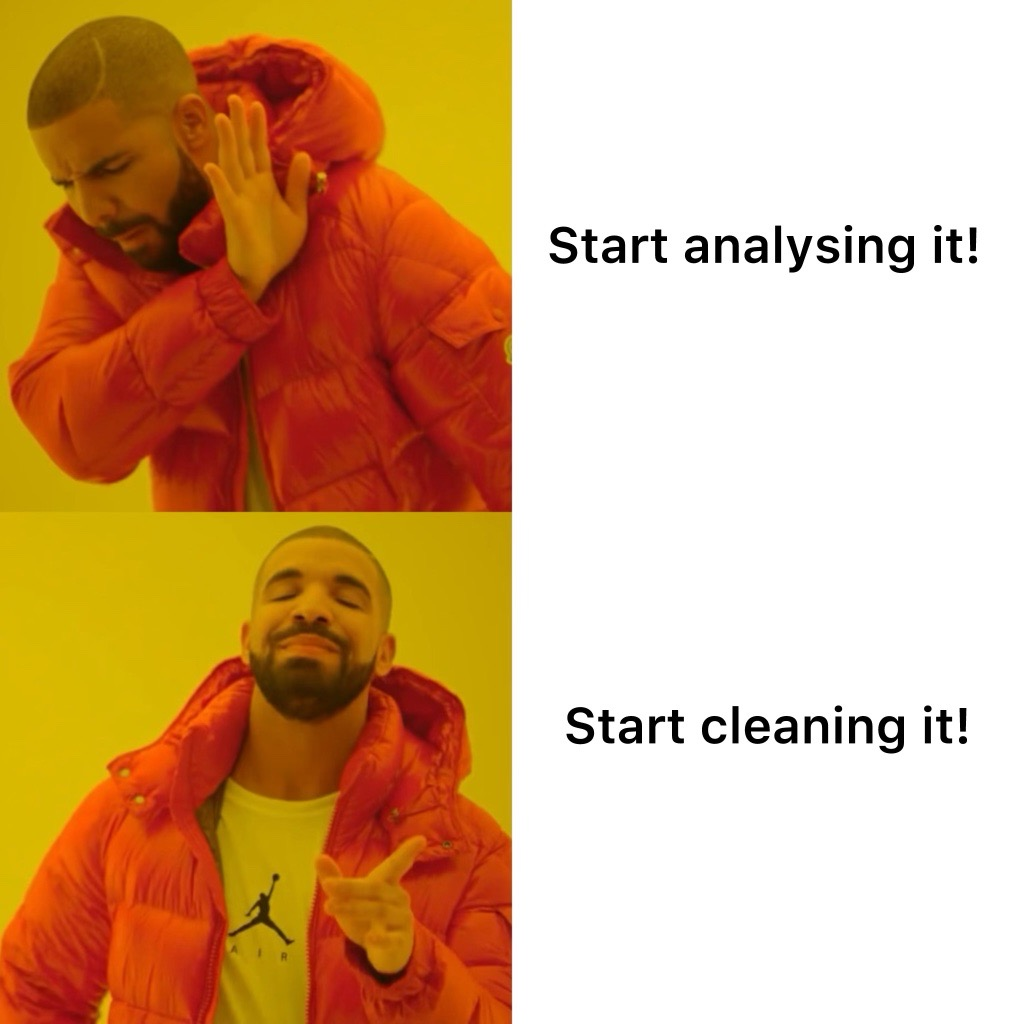

In [32]:
display(Image(filename="DowithData.jpeg", width=600, height=600))

In [33]:
merged_data.isnull().sum()

Country                     0
Deaths_2019                 1
Deaths_2021                 1
Other_2019                  3
Other_2021                  3
AlcoholicBeverages_2019     4
AlcoholicBeverages_2021     3
Sugar_2019                  3
Sugar_2021                  3
OilsAndFats_2019            3
OilsAndFats_2021            3
Meat_2019                   3
Meat_2021                   3
DairyAndEggs_2019           3
DairyAndEggs_2021           3
FruitsAndVeg_2019           3
FruitsAndVeg_2021           3
StarchyRoots_2019           3
StarchyRoots_2021           3
Pulses_2019                 3
Pulses_2021                 3
CerealsAndGrains_2019       3
CerealsAndGrains_2021       3
Schizophrenia_2019          1
DepressiveDisorders_2019    1
AnxietyDisorders_2019       1
BipolarDisorder_2019        1
EatingDisorders_2019        1
Schizophrenia_2021          1
DepressiveDisorders_2021    1
AnxietyDisorders_2021       1
BipolarDisorder_2021        1
EatingDisorders_2021        1
dtype: int

<Axes: >

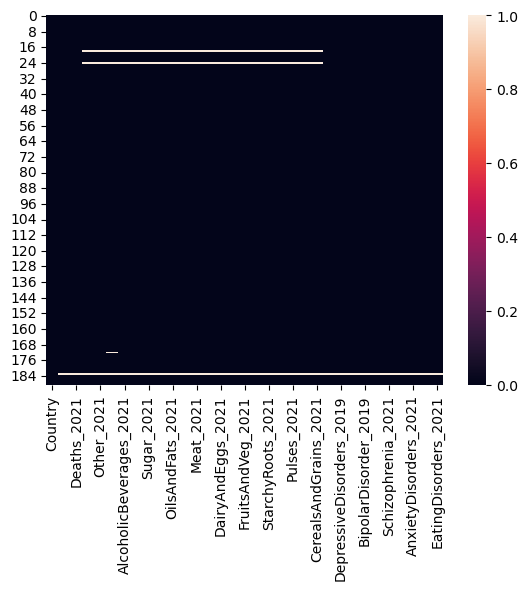

In [34]:
sns.heatmap(merged_data.isnull())

In [35]:
rows_with_nulls = merged_data[merged_data.isnull().any(axis=1)]

print(rows_with_nulls)

                  Country  Deaths_2019  Deaths_2021  Other_2019  Other_2021  \
18                Bermuda          9.0          9.0         NaN         NaN   
24                 Brunei         26.0         27.0         NaN         NaN   
172  United Arab Emirates        301.0        280.0        84.0        89.0   
183                 Other          NaN          NaN         NaN         NaN   

     AlcoholicBeverages_2019  AlcoholicBeverages_2021  Sugar_2019  Sugar_2021  \
18                       NaN                      NaN         NaN         NaN   
24                       NaN                      NaN         NaN         NaN   
172                      NaN                     21.0       382.0       150.0   
183                      NaN                      NaN         NaN         NaN   

     OilsAndFats_2019  ...  Schizophrenia_2019  DepressiveDisorders_2019  \
18                NaN  ...                 0.2                       3.1   
24                NaN  ...                 0.3

In [36]:
merged_data[merged_data['Country'] == 'Other']

,Country,Deaths_2019,Deaths_2021,Other_2019,Other_2021,AlcoholicBeverages_2019,AlcoholicBeverages_2021,Sugar_2019,Sugar_2021,OilsAndFats_2019,...,Schizophrenia_2019,DepressiveDisorders_2019,AnxietyDisorders_2019,BipolarDisorder_2019,EatingDisorders_2019,Schizophrenia_2021,DepressiveDisorders_2021,AnxietyDisorders_2021,BipolarDisorder_2021,EatingDisorders_2021
183,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
index_to_drop = merged_data[merged_data['Country'] == 'Other'].index

merged_data = merged_data.drop(index=index_to_drop)

In [38]:
merged_data.isnull().sum()

Country                     0
Deaths_2019                 0
Deaths_2021                 0
Other_2019                  2
Other_2021                  2
AlcoholicBeverages_2019     3
AlcoholicBeverages_2021     2
Sugar_2019                  2
Sugar_2021                  2
OilsAndFats_2019            2
OilsAndFats_2021            2
Meat_2019                   2
Meat_2021                   2
DairyAndEggs_2019           2
DairyAndEggs_2021           2
FruitsAndVeg_2019           2
FruitsAndVeg_2021           2
StarchyRoots_2019           2
StarchyRoots_2021           2
Pulses_2019                 2
Pulses_2021                 2
CerealsAndGrains_2019       2
CerealsAndGrains_2021       2
Schizophrenia_2019          0
DepressiveDisorders_2019    0
AnxietyDisorders_2019       0
BipolarDisorder_2019        0
EatingDisorders_2019        0
Schizophrenia_2021          0
DepressiveDisorders_2021    0
AnxietyDisorders_2021       0
BipolarDisorder_2021        0
EatingDisorders_2021        0
dtype: int

In [39]:
rows_with_nulls = merged_data[merged_data.isnull().any(axis=1)]

print(rows_with_nulls['Country'])

18                  Bermuda
24                   Brunei
172    United Arab Emirates
Name: Country, dtype: object


In [40]:
countries_with_nulls = ['Bermuda','Brunei','United Arab Emirates']
rows_of_countries_with_nulls = merged_data[merged_data['Country'].isin(countries_with_nulls)]
rows_of_countries_with_nulls

,Country,Deaths_2019,Deaths_2021,Other_2019,Other_2021,AlcoholicBeverages_2019,AlcoholicBeverages_2021,Sugar_2019,Sugar_2021,OilsAndFats_2019,...,Schizophrenia_2019,DepressiveDisorders_2019,AnxietyDisorders_2019,BipolarDisorder_2019,EatingDisorders_2019,Schizophrenia_2021,DepressiveDisorders_2021,AnxietyDisorders_2021,BipolarDisorder_2021,EatingDisorders_2021
18,Bermuda,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2,3.1,4.3,0.9,0.4,0.2,3.6,5.3,0.9,0.4
24,Brunei,26.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.3,1.7,2.9,0.5,0.5,0.3,1.9,3.3,0.5,0.5
172,United Arab Emirates,301.0,280.0,84.0,89.0,NaN,21.0,382.0,150.0,894.0,...,0.3,3.8,4.3,0.7,0.3,0.3,4.3,5.2,0.7,0.3


In [41]:
rows_of_countries_with_nulls_filled = rows_of_countries_with_nulls.fillna(merged_data.mean(numeric_only=True))

merged_data.update(rows_of_countries_with_nulls_filled)

In [42]:
countries_with_nulls = ['Bermuda','Brunei','United Arab Emirates']
rows_of_countries_with_nulls = merged_data[merged_data['Country'].isin(countries_with_nulls)]
rows_of_countries_with_nulls

,Country,Deaths_2019,Deaths_2021,Other_2019,Other_2021,AlcoholicBeverages_2019,AlcoholicBeverages_2021,Sugar_2019,Sugar_2021,OilsAndFats_2019,...,Schizophrenia_2019,DepressiveDisorders_2019,AnxietyDisorders_2019,BipolarDisorder_2019,EatingDisorders_2019,Schizophrenia_2021,DepressiveDisorders_2021,AnxietyDisorders_2021,BipolarDisorder_2021,EatingDisorders_2021
18,Bermuda,9.0,9.0,66.122527,69.112419,77.877243,77.921344,287.351344,281.226183,472.21672,...,0.2,3.1,4.3,0.9,0.4,0.2,3.6,5.3,0.9,0.4
24,Brunei,26.0,27.0,66.122527,69.112419,77.877243,77.921344,287.351344,281.226183,472.21672,...,0.3,1.7,2.9,0.5,0.5,0.3,1.9,3.3,0.5,0.5
172,United Arab Emirates,301.0,280.0,84.000000,89.000000,77.877243,21.000000,382.000000,150.000000,894.00000,...,0.3,3.8,4.3,0.7,0.3,0.3,4.3,5.2,0.7,0.3


In [43]:
merged_data.isnull().sum()

Country                     0
Deaths_2019                 0
Deaths_2021                 0
Other_2019                  0
Other_2021                  0
AlcoholicBeverages_2019     0
AlcoholicBeverages_2021     0
Sugar_2019                  0
Sugar_2021                  0
OilsAndFats_2019            0
OilsAndFats_2021            0
Meat_2019                   0
Meat_2021                   0
DairyAndEggs_2019           0
DairyAndEggs_2021           0
FruitsAndVeg_2019           0
FruitsAndVeg_2021           0
StarchyRoots_2019           0
StarchyRoots_2021           0
Pulses_2019                 0
Pulses_2021                 0
CerealsAndGrains_2019       0
CerealsAndGrains_2021       0
Schizophrenia_2019          0
DepressiveDisorders_2019    0
AnxietyDisorders_2019       0
BipolarDisorder_2019        0
EatingDisorders_2019        0
Schizophrenia_2021          0
DepressiveDisorders_2021    0
AnxietyDisorders_2021       0
BipolarDisorder_2021        0
EatingDisorders_2021        0
dtype: int

In [44]:
merged_data.describe()

,Deaths_2019,Deaths_2021,Other_2019,Other_2021,AlcoholicBeverages_2019,AlcoholicBeverages_2021,Sugar_2019,Sugar_2021,OilsAndFats_2019,OilsAndFats_2021,...,Schizophrenia_2019,DepressiveDisorders_2019,AnxietyDisorders_2019,BipolarDisorder_2019,EatingDisorders_2019,Schizophrenia_2021,DepressiveDisorders_2021,AnxietyDisorders_2021,BipolarDisorder_2021,EatingDisorders_2021
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,...,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,10042.819149,10477.723404,66.122527,69.112419,77.877243,77.921344,287.351344,281.226183,472.216720,478.444731,...,0.240426,3.847872,4.029255,0.595213,0.236170,0.239894,4.354255,4.847340,0.595213,0.235106
std,53838.729870,56279.760745,53.838505,52.885940,66.755908,67.405084,133.279877,130.323903,213.224436,213.713136,...,0.054369,0.937083,1.117314,0.197114,0.147239,0.054272,1.044944,1.380709,0.197114,0.148941
min,1.000000,1.000000,3.000000,4.000000,0.000000,0.000000,36.000000,27.000000,73.000000,67.000000,...,0.200000,1.700000,2.000000,0.200000,0.100000,0.200000,1.900000,2.300000,0.200000,0.100000
25%,160.250000,167.000000,29.937500,32.037500,19.750000,21.000000,176.000000,175.750000,326.985000,338.497500,...,0.200000,3.100000,3.300000,0.500000,0.100000,0.200000,3.500000,3.975000,0.500000,0.100000
50%,534.500000,523.000000,48.000000,52.000000,65.000000,67.000000,292.000000,282.113091,426.500000,426.000000,...,0.200000,3.750000,3.700000,0.500000,0.200000,0.200000,4.300000,4.600000,0.500000,0.200000
75%,2009.750000,1945.250000,90.992500,97.000000,124.000000,125.250000,394.500000,382.000000,580.000000,597.750000,...,0.300000,4.500000,4.600000,0.800000,0.300000,0.300000,5.000000,5.525000,0.800000,0.300000
max,630329.000000,657619.000000,327.000000,265.970000,336.990000,339.990000,596.000000,603.000000,1164.000000,1178.000000,...,0.400000,7.000000,7.700000,1.400000,1.000000,0.400000,7.800000,9.700000,1.400000,1.100000


<Axes: >

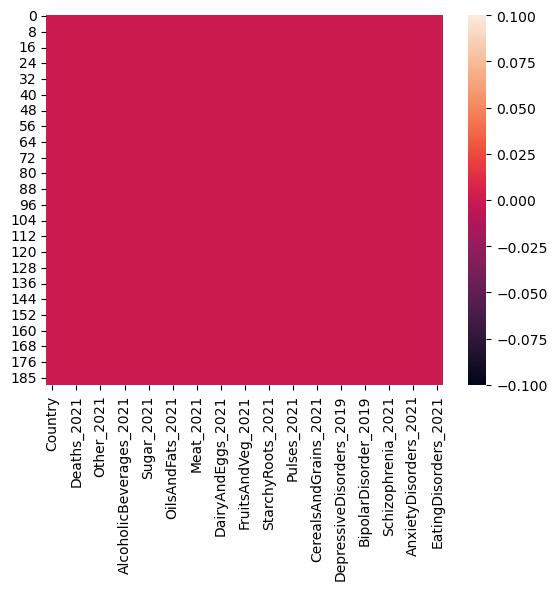

In [45]:
sns.heatmap(merged_data.isnull())

In [46]:
merged_data.dtypes

Country                      object
Deaths_2019                 float64
Deaths_2021                 float64
Other_2019                  float64
Other_2021                  float64
AlcoholicBeverages_2019     float64
AlcoholicBeverages_2021     float64
Sugar_2019                  float64
Sugar_2021                  float64
OilsAndFats_2019            float64
OilsAndFats_2021            float64
Meat_2019                   float64
Meat_2021                   float64
DairyAndEggs_2019           float64
DairyAndEggs_2021           float64
FruitsAndVeg_2019           float64
FruitsAndVeg_2021           float64
StarchyRoots_2019           float64
StarchyRoots_2021           float64
Pulses_2019                 float64
Pulses_2021                 float64
CerealsAndGrains_2019       float64
CerealsAndGrains_2021       float64
Schizophrenia_2019          float64
DepressiveDisorders_2019    float64
AnxietyDisorders_2019       float64
BipolarDisorder_2019        float64
EatingDisorders_2019        

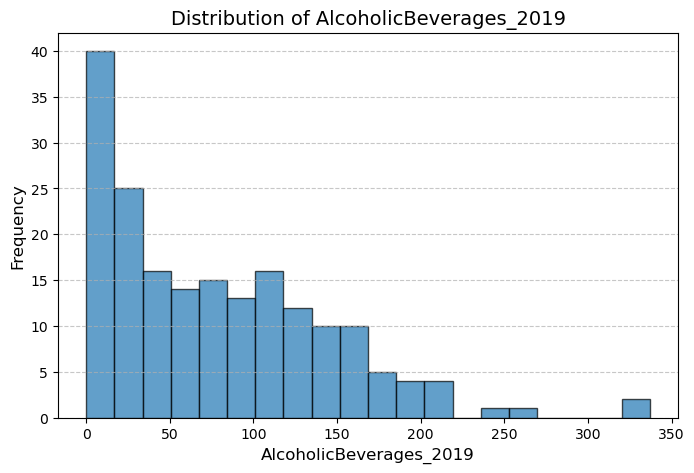

In [47]:
plt.figure(figsize=(8, 5))
plt.hist(merged_data['AlcoholicBeverages_2019'], bins=20, edgecolor='black', alpha=0.7)
plt.title(f'Distribution of AlcoholicBeverages_2019', fontsize=14)
plt.xlabel('AlcoholicBeverages_2019', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

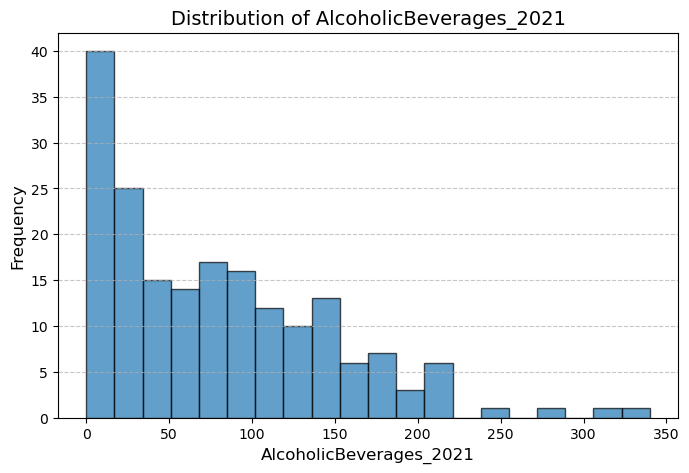

In [48]:
plt.figure(figsize=(8, 5))
plt.hist(merged_data['AlcoholicBeverages_2021'], bins=20, edgecolor='black', alpha=0.7)
plt.title(f'Distribution of AlcoholicBeverages_2021', fontsize=14)
plt.xlabel('AlcoholicBeverages_2021', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

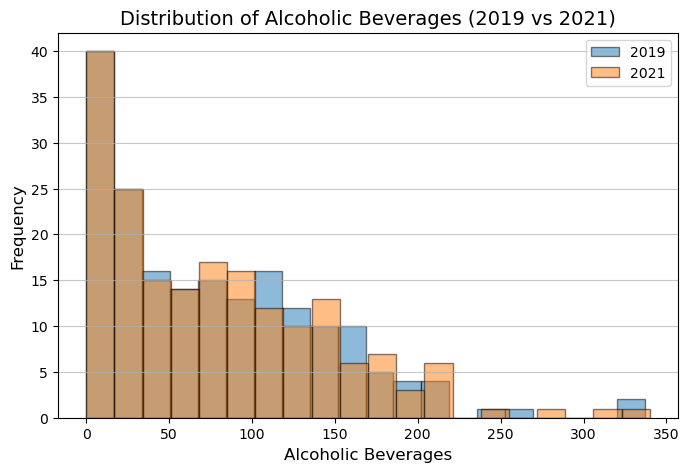

In [49]:
plt.figure(figsize=(8, 5))

plt.hist(merged_data['AlcoholicBeverages_2019'], bins=20, edgecolor='black', alpha=0.5, label='2019')

plt.hist(merged_data['AlcoholicBeverages_2021'], bins=20, edgecolor='black', alpha=0.5, label='2021')

plt.title('Distribution of Alcoholic Beverages (2019 vs 2021)', fontsize=14)
plt.xlabel('Alcoholic Beverages', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.7)
plt.legend()
plt.show()

In [50]:
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns


<Axes: >

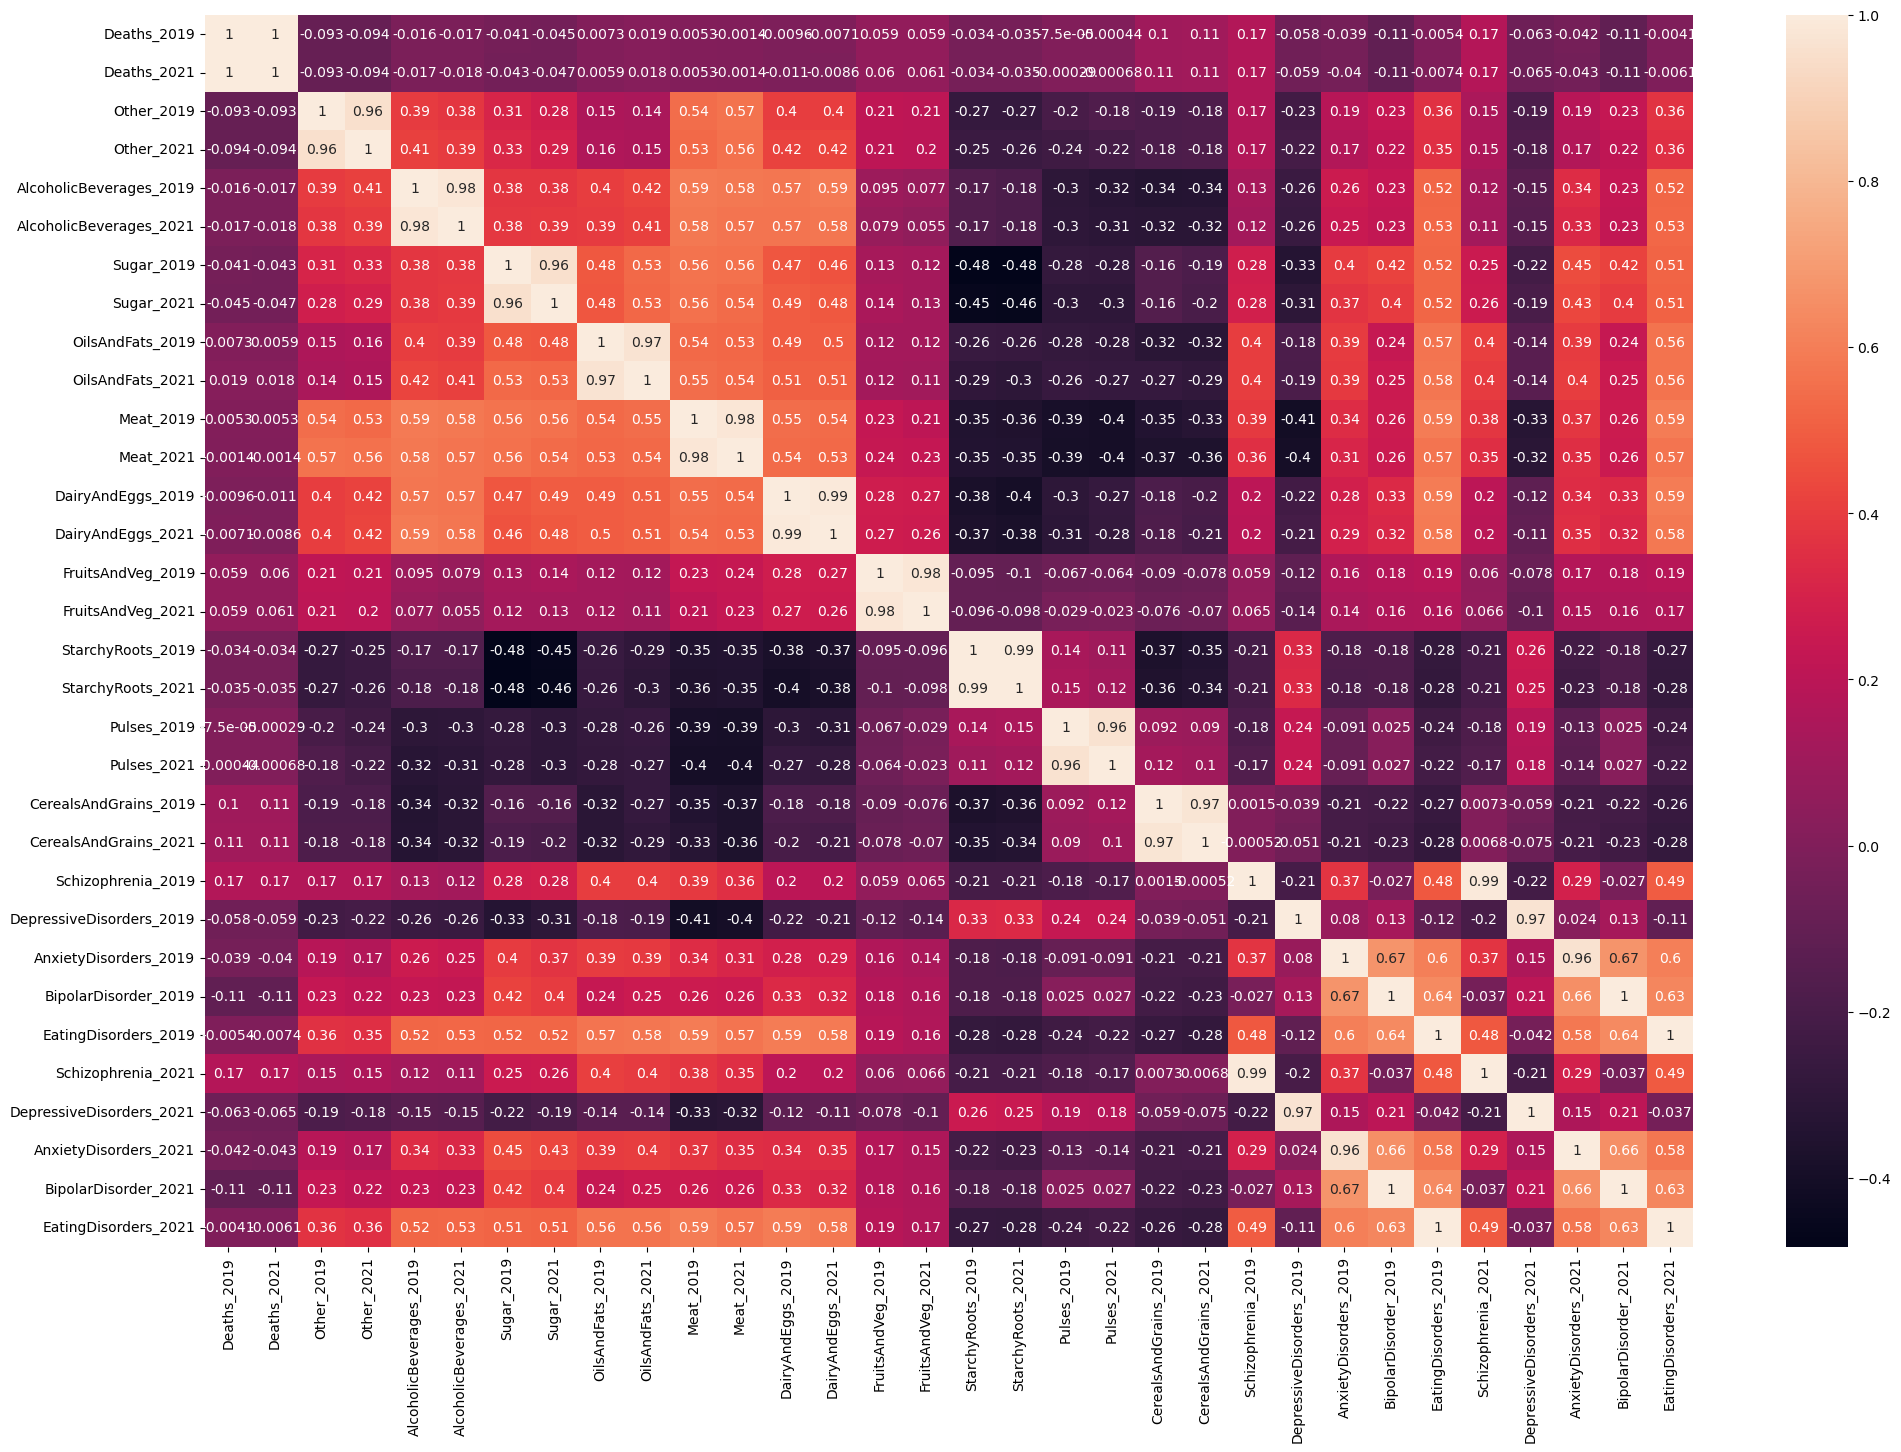

In [51]:
correlation_matrix = merged_data[numeric_columns].corr()

plt.figure(figsize=(24, 16))
sns.heatmap(correlation_matrix, annot=True)

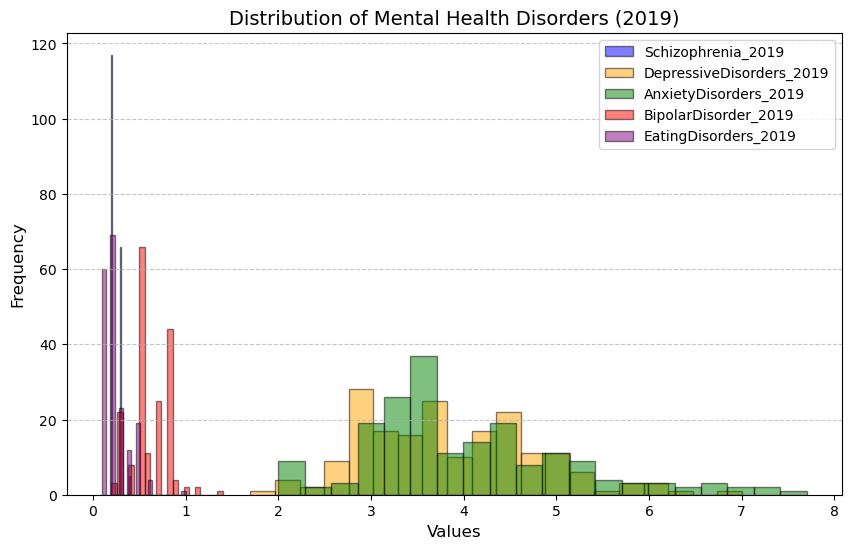

In [52]:
columns_to_plot = [
    'Schizophrenia_2019',
    'DepressiveDisorders_2019',
    'AnxietyDisorders_2019',
    'BipolarDisorder_2019',
    'EatingDisorders_2019'
]

# Define colors for each dataset
colors = ['blue', 'orange', 'green', 'red', 'purple']

plt.figure(figsize=(10, 6))

# Plot histograms for each column
for col, color in zip(columns_to_plot, colors):
    plt.hist(merged_data[col], bins=20, edgecolor='black', alpha=0.5, label=col, color=color)

# Add titles and labels
plt.title('Distribution of Mental Health Disorders (2019)', fontsize=14)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()  # Add legend to distinguish datasets
plt.show()

In [53]:
columns_to_plot_2019 = [
    'Schizophrenia_2019',
    'DepressiveDisorders_2019',
    'AnxietyDisorders_2019',
    'BipolarDisorder_2019',
    'EatingDisorders_2019'
]

columns_to_plot_2021 = ['Schizophrenia_2021', 'DepressiveDisorders_2021',
    'AnxietyDisorders_2021',
    'BipolarDisorder_2021',
    'EatingDisorders_2021'
]


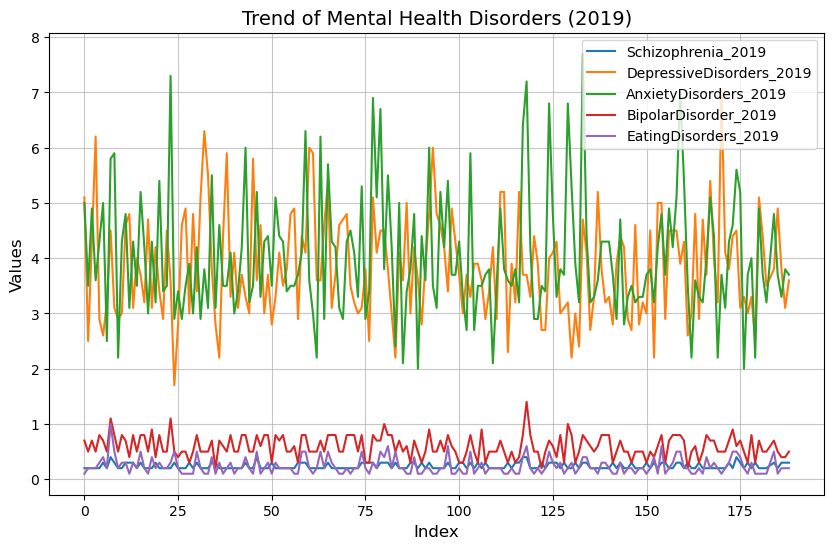

In [54]:
plt.figure(figsize=(10, 6))

# Plot lines for each column
for col in columns_to_plot_2019:
    plt.plot(merged_data[col], label=col)

plt.title('Trend of Mental Health Disorders (2019)', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.grid(axis='both', alpha=0.7)
plt.legend()
plt.show()

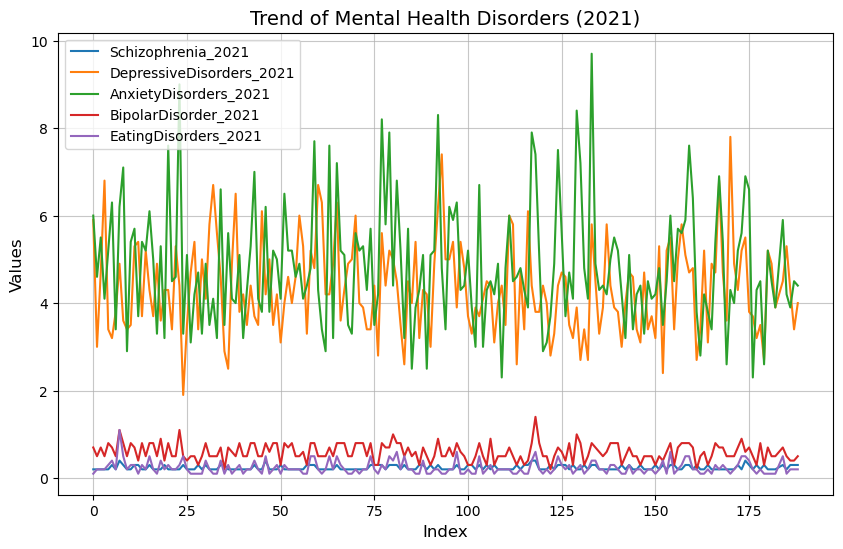

In [55]:
plt.figure(figsize=(10, 6))

# Plot lines for each column
for col in columns_to_plot_2021:
    plt.plot(merged_data[col], label=col)

plt.title('Trend of Mental Health Disorders (2021)', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.grid(axis='both', alpha=0.7)
plt.legend()
plt.show()

In [56]:
top_countries = merged_data.nlargest(10, 'Sugar_2021')

countries = top_countries['Country']
sugar_2019 = top_countries['Sugar_2019']
sugar_2021 = top_countries['Sugar_2021']

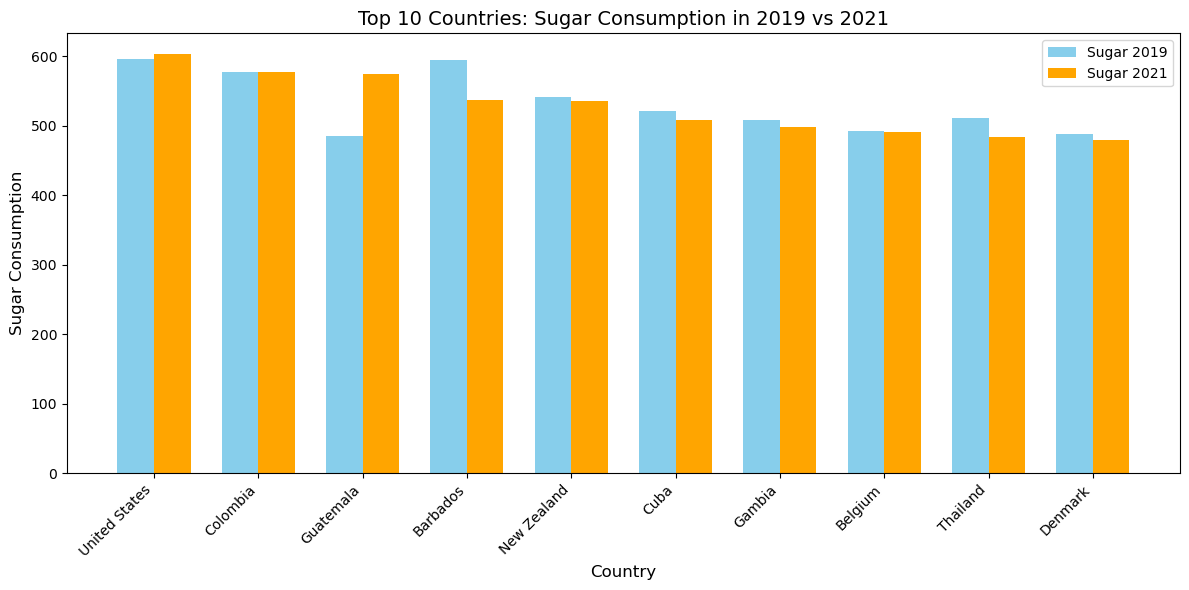

In [57]:
x = np.arange(len(countries))
width = 0.35

plt.figure(figsize=(12, 6))

plt.bar(x - width/2, sugar_2019, width, label='Sugar 2019', color='skyblue')
plt.bar(x + width/2, sugar_2021, width, label='Sugar 2021', color='orange')

plt.title('Top 10 Countries: Sugar Consumption in 2019 vs 2021', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Sugar Consumption', fontsize=12)
plt.xticks(x, countries, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

In [58]:
#to save the cleaned dataset

cleaned_dataset_path = 'cleaned_merged_data.csv'
merged_data.to_csv(cleaned_dataset_path, index=False)

In [59]:
merged_data.columns

Index(['Country', 'Deaths_2019', 'Deaths_2021', 'Other_2019', 'Other_2021',
       'AlcoholicBeverages_2019', 'AlcoholicBeverages_2021', 'Sugar_2019',
       'Sugar_2021', 'OilsAndFats_2019', 'OilsAndFats_2021', 'Meat_2019',
       'Meat_2021', 'DairyAndEggs_2019', 'DairyAndEggs_2021',
       'FruitsAndVeg_2019', 'FruitsAndVeg_2021', 'StarchyRoots_2019',
       'StarchyRoots_2021', 'Pulses_2019', 'Pulses_2021',
       'CerealsAndGrains_2019', 'CerealsAndGrains_2021', 'Schizophrenia_2019',
       'DepressiveDisorders_2019', 'AnxietyDisorders_2019',
       'BipolarDisorder_2019', 'EatingDisorders_2019', 'Schizophrenia_2021',
       'DepressiveDisorders_2021', 'AnxietyDisorders_2021',
       'BipolarDisorder_2021', 'EatingDisorders_2021'],
      dtype='object')

<Axes: xlabel='DairyAndEggs_2021', ylabel='count'>

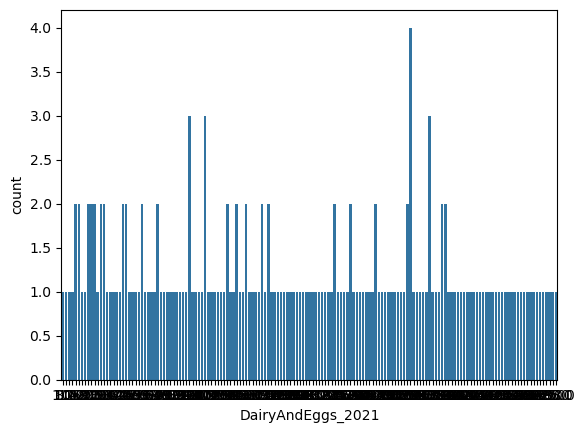

In [60]:
sns.countplot(x='DairyAndEggs_2021',data=merged_data)

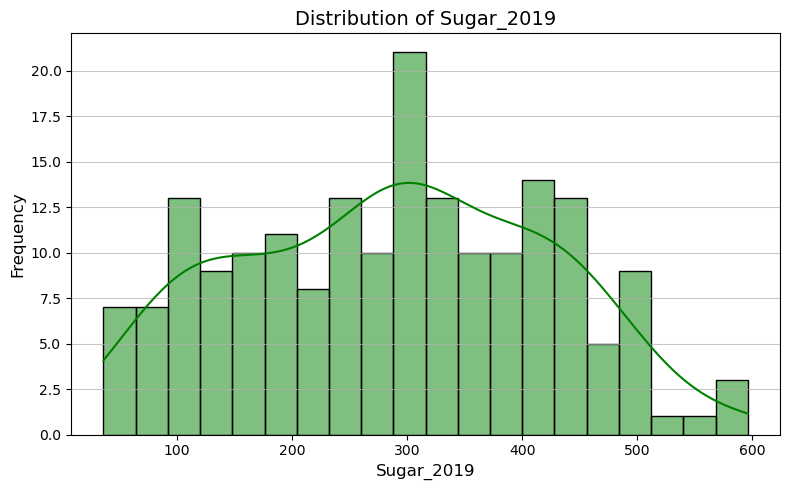

In [61]:
plt.figure(figsize=(8, 5))
sns.histplot(merged_data['Sugar_2019'], kde=True, bins=20, color='green', edgecolor='black')
plt.title(f'Distribution of Sugar_2019', fontsize=14)
plt.xlabel('Sugar_2019', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

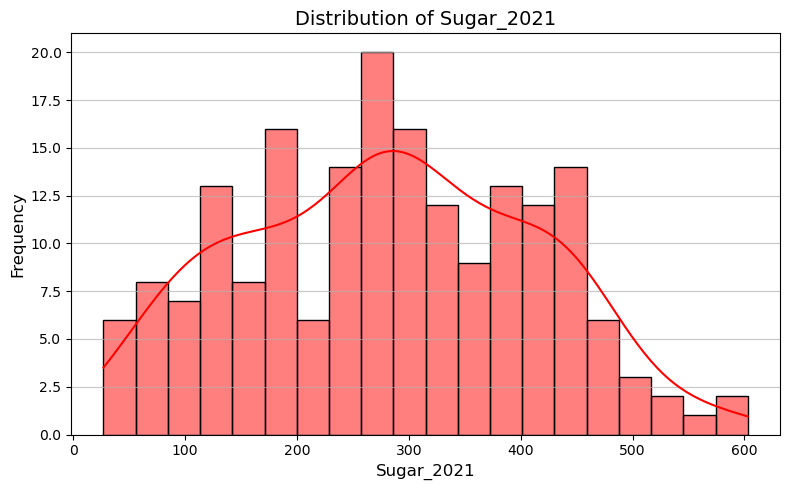

In [62]:
plt.figure(figsize=(8, 5))
sns.histplot(merged_data['Sugar_2021'], kde=True, bins=20, color='red', edgecolor='black')
plt.title(f'Distribution of Sugar_2021', fontsize=14)
plt.xlabel('Sugar_2021', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

In [63]:
columns_2019 = [
    'Other_2019', 'AlcoholicBeverages_2019', 'Sugar_2019', 'OilsAndFats_2019',
    'Meat_2019', 'DairyAndEggs_2019', 'FruitsAndVeg_2019', 'StarchyRoots_2019',
    'Pulses_2019', 'CerealsAndGrains_2019'
]

columns_2021 = [
    'Other_2021', 'AlcoholicBeverages_2021', 'Sugar_2021', 'OilsAndFats_2021',
    'Meat_2021', 'DairyAndEggs_2021', 'FruitsAndVeg_2021', 'StarchyRoots_2021',
    'Pulses_2021', 'CerealsAndGrains_2021'
]

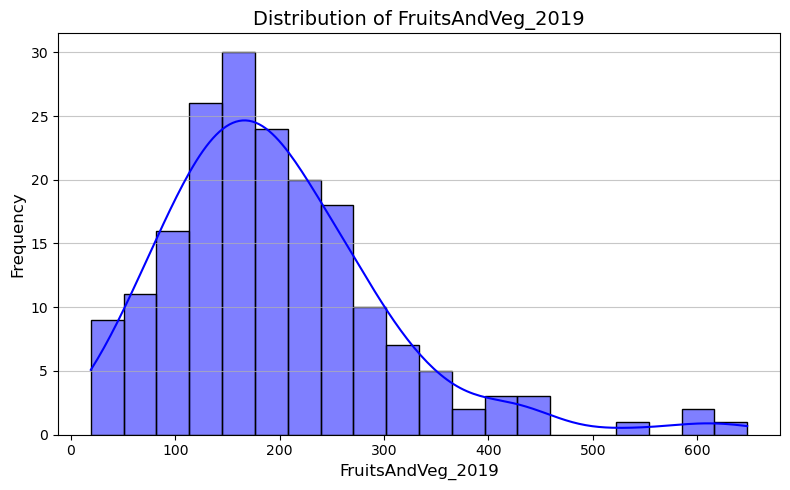

In [64]:
plt.figure(figsize=(8, 5))
sns.histplot(merged_data['FruitsAndVeg_2019'], kde=True, bins=20, color='blue', edgecolor='black')
plt.title(f'Distribution of FruitsAndVeg_2019', fontsize=14)
plt.xlabel('FruitsAndVeg_2019', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

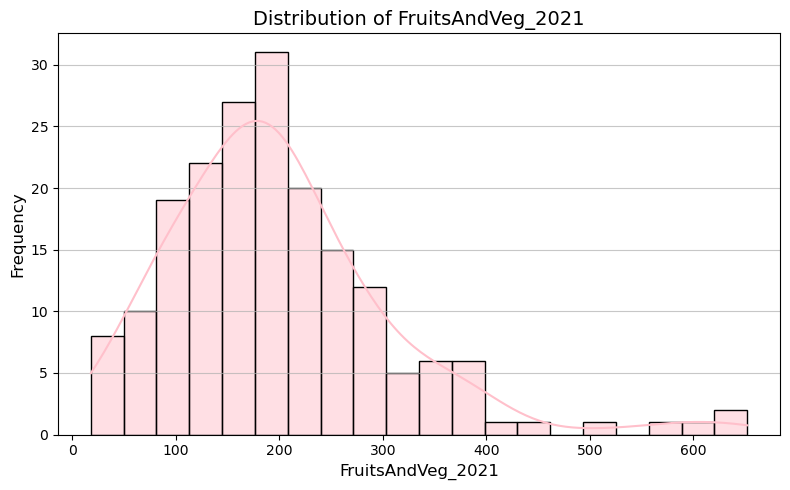

In [65]:
plt.figure(figsize=(8, 5))
sns.histplot(merged_data['FruitsAndVeg_2021'], kde=True, bins=20, color='pink', edgecolor='black')
plt.title(f'Distribution of FruitsAndVeg_2021', fontsize=14)
plt.xlabel('FruitsAndVeg_2021', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

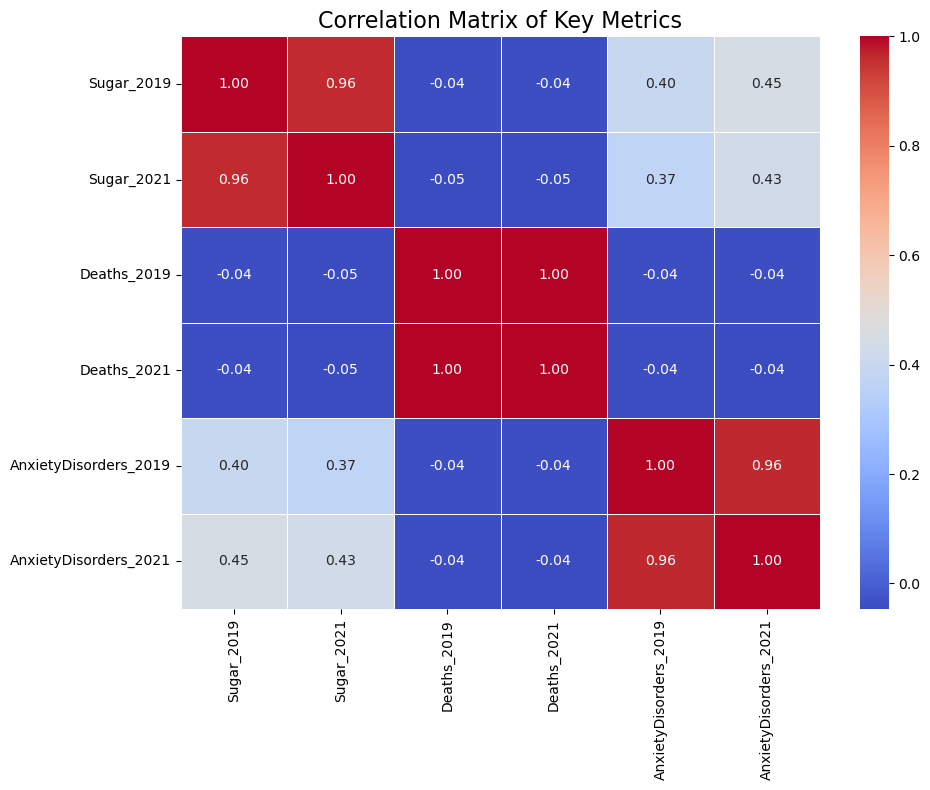

In [66]:
correlation_columns = ['Sugar_2019', 'Sugar_2021', 'Deaths_2019', 'Deaths_2021', 'AnxietyDisorders_2019', 'AnxietyDisorders_2021']
correlation_matrix = merged_data[correlation_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Key Metrics', fontsize=16)
plt.tight_layout()
plt.show()

In [67]:
pip install pymc arviz numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [68]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import pytensor

file_path = 'cleaned_merged_data.csv'  
data = pd.read_csv(file_path)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [69]:
print("Dataset Overview:")
print(data.info())
print(data.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   188 non-null    object 
 1   Deaths_2019               188 non-null    float64
 2   Deaths_2021               188 non-null    float64
 3   Other_2019                188 non-null    float64
 4   Other_2021                188 non-null    float64
 5   AlcoholicBeverages_2019   188 non-null    float64
 6   AlcoholicBeverages_2021   188 non-null    float64
 7   Sugar_2019                188 non-null    float64
 8   Sugar_2021                188 non-null    float64
 9   OilsAndFats_2019          188 non-null    float64
 10  OilsAndFats_2021          188 non-null    float64
 11  Meat_2019                 188 non-null    float64
 12  Meat_2021                 188 non-null    float64
 13  DairyAndEggs_2019         188 non-null    float

In [70]:
columns_to_clean = ['Sugar_2021', 'FruitsAndVeg_2021', 'Deaths_2021', 'AnxietyDisorders_2021']
for col in columns_to_clean:
    data[col] = pd.to_numeric(data[col].replace(',', '', regex=True), errors='coerce')

In [71]:
data = data.dropna(subset=columns_to_clean)

In [72]:
print("Columns in the dataset:")
print(data.columns)

Columns in the dataset:
Index(['Country', 'Deaths_2019', 'Deaths_2021', 'Other_2019', 'Other_2021',
       'AlcoholicBeverages_2019', 'AlcoholicBeverages_2021', 'Sugar_2019',
       'Sugar_2021', 'OilsAndFats_2019', 'OilsAndFats_2021', 'Meat_2019',
       'Meat_2021', 'DairyAndEggs_2019', 'DairyAndEggs_2021',
       'FruitsAndVeg_2019', 'FruitsAndVeg_2021', 'StarchyRoots_2019',
       'StarchyRoots_2021', 'Pulses_2019', 'Pulses_2021',
       'CerealsAndGrains_2019', 'CerealsAndGrains_2021', 'Schizophrenia_2019',
       'DepressiveDisorders_2019', 'AnxietyDisorders_2019',
       'BipolarDisorder_2019', 'EatingDisorders_2019', 'Schizophrenia_2021',
       'DepressiveDisorders_2021', 'AnxietyDisorders_2021',
       'BipolarDisorder_2021', 'EatingDisorders_2021'],
      dtype='object')


##### Execute the below line,
##### conda install m2w64-toolchain

In [74]:
import pymc as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

# Define outcome and single predictor
y = data['AnxietyDisorders_2021'].values  # Outcome variable
X = data['Sugar_2021'].values             # Single predictor

# Define the Bayesian model
with pm.Model() as simple_bayesian_model:
    # Priors for coefficients
    beta_0 = pm.Normal("beta_0", mu=0, sigma=1)  # Intercept
    beta_1 = pm.Normal("beta_1", mu=0, sigma=1)  # Effect of Sugar on Anxiety
    
    # Error term
    sigma = pm.HalfNormal("sigma", sigma=1)  # Standard deviation of residuals
    
    # Linear model
    mu = beta_0 + beta_1 * X
    
    # Likelihood (observed data)
    likelihood = pm.Normal("y", mu=mu, sigma=sigma, observed=y)
    
    # Sampling
    trace = pm.sample(1000, tune=500, cores=1, chains=4, return_inferencedata=True)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [beta_0, beta_1, sigma]


Output()

Output()

Output()

Output()

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 17 seconds.



Model Summary:
        mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
beta_0  3.40  0.21    3.00     3.79       0.01      0.0   1588.43   1992.79   
beta_1  0.01  0.00    0.00     0.01       0.00      0.0   1595.41   1917.34   
sigma   1.25  0.07    1.13     1.38       0.00      0.0   2083.75   1805.53   

        r_hat  
beta_0    1.0  
beta_1    1.0  
sigma     1.0  


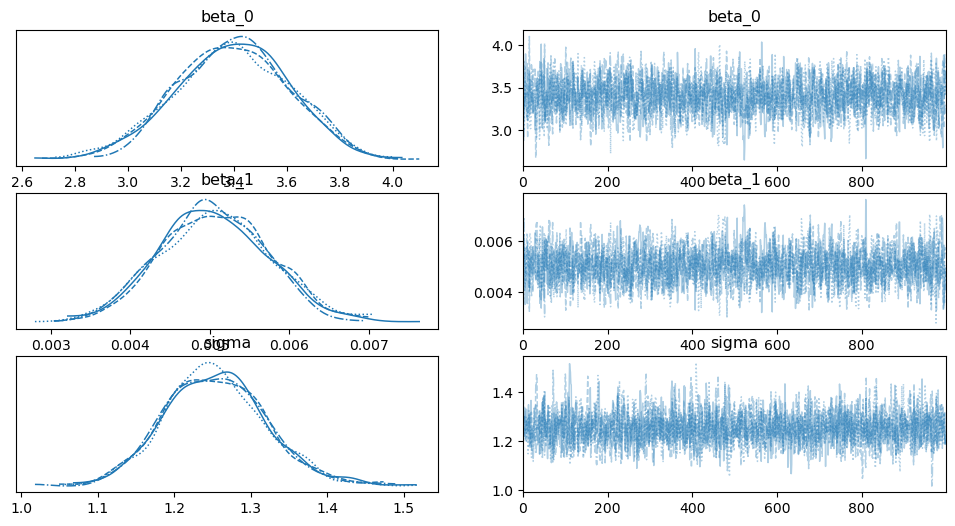

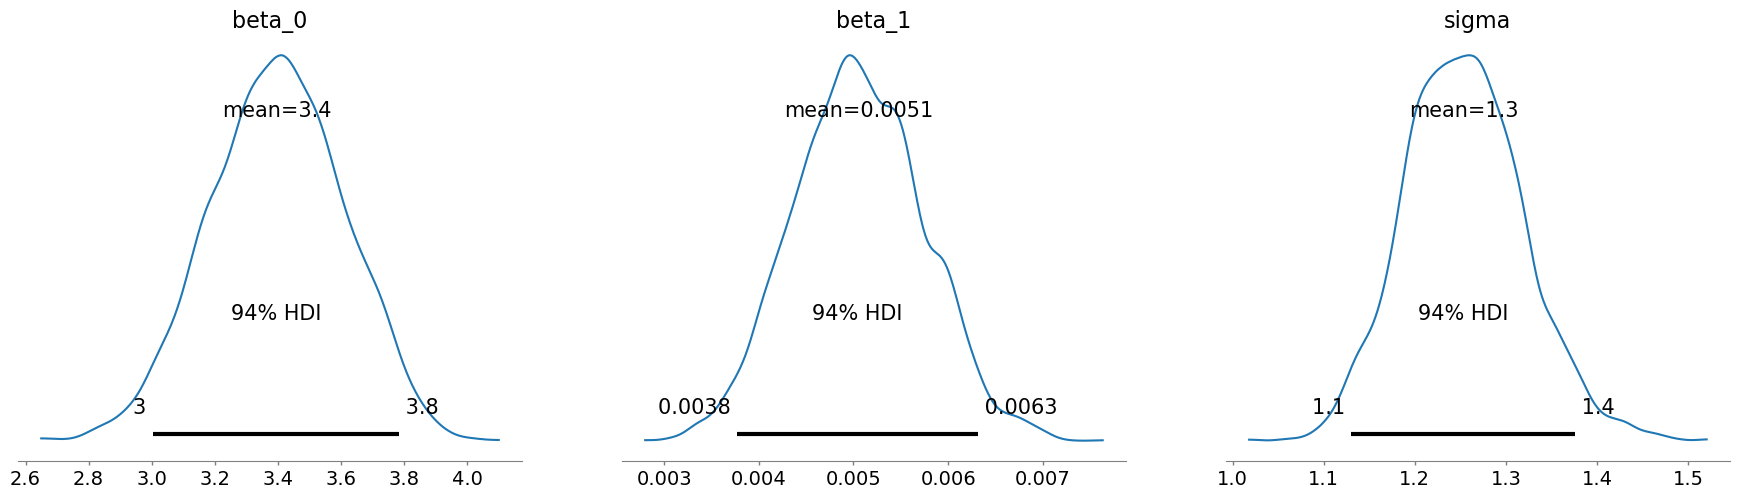

Sampling: [y]


Output()

C:\Softwares\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


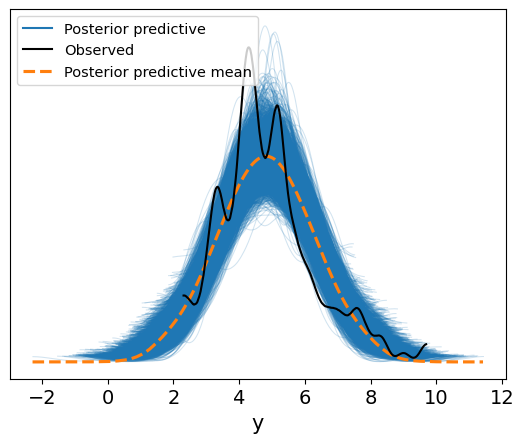

In [75]:
# Summarize the posterior distributions
summary = az.summary(trace, round_to=2)
print("\nModel Summary:")
print(summary)

# Visualize trace plots to check convergence
az.plot_trace(trace)
plt.show()

# Visualize posterior distributions
az.plot_posterior(trace)
plt.show()

# Posterior predictive checks
with simple_bayesian_model:
    ppc = pm.sample_posterior_predictive(trace)
az.plot_ppc(ppc)
plt.show()


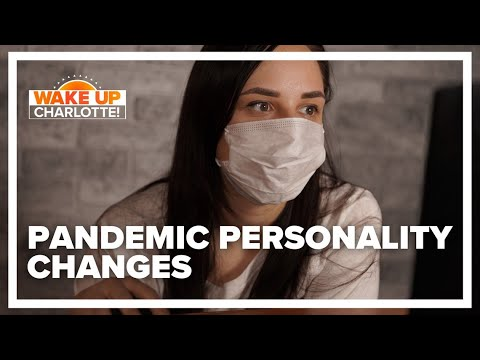

In [76]:
from IPython.display import YouTubeVideo
video_id = "zi8ur00Lv5A"
YouTubeVideo(video_id, width=800, height=450)

### Scientific Conclusion

##### Objective:
Investigated the relationship between sugar intake (Sugar_2021) and anxiety disorders prevalence (AnxietyDisorders_2021) using Bayesian regression.

##### Key Findings:
Positive association observed with a small effect size (β1\beta_1β1: 0.005, 94% HDI: [0.0037, 0.0063]).
Increased sugar intake is linked to higher anxiety prevalence.

##### Implications:
Supports existing research suggesting dietary sugar influences mental health.
Findings are credible despite the small magnitude of the effect.

##### Limitations:
Did not account for other factors like physical activity, socioeconomic status, or genetics.
Assumes linearity and is limited by the available predictors.

##### Recommendations:
Encourage public health strategies to reduce sugar consumption.
Future studies should incorporate additional variables and test for interactions.

### Actionable insights

#### In 2020, during Covid a dataset has been collected where people from different countries involved themselves in various activities to overcome the personality changes they faced during the hard time.

1. Engaged in religious/spiritual activities
2. Improved healthy lifestyle behaviors	
3. Eat quality and healthy food	
4. Reduce sugar intake
5. Reduce oil intake
6. Increase vegetables and Fruits intake
7. Avoid processed foods
8. Engage in physical activities like gym, walking, running, playing
   

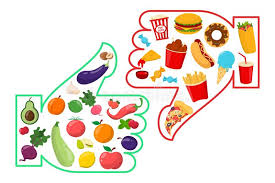

In [154]:
display(Image(filename="conclusion.jpeg", width=500, height=500))